The objective of this notebook is to intersect the sample metadata with the taxonomic profiling information to see the top 20-25 groups for each individual over the time series of the sampling.

- load sample metadata
- order metadata by sample timestamp
- group sample metadata by participant
- for each participant, plot the relative abundances of their top 20-25 taxons (at each level)

In [229]:
import Pkg
pkgs = [
    "Revise",
    "DataFrames",
    "StatsBase",
    "StatsPlots",
    "uCSV",
    "ProgressMeter",
    "Distances",
    "Clustering",
    "Colors",
    "MultivariateStats",
    "Dates",
    "CategoricalArrays",
    "GLM",
    "MLJ",
    "Statistics"
]
Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
import Mycelia

   Resolving package versions...
   Installed InitialValues ──────────── v0.3.1
   Installed CategoricalDistributions ─ v0.1.13
   Installed EarlyStopping ──────────── v0.3.0
   Installed ContextVariablesX ──────── v0.1.3
   Installed LearnAPI ───────────────── v0.1.0
   Installed StatisticalTraits ──────── v3.2.0
   Installed ShowCases ──────────────── v0.1.0
   Installed NNlib ──────────────────── v0.9.9
   Installed PrettyPrint ────────────── v0.2.0
   Installed FLoopsBase ─────────────── v0.1.1
   Installed IterationControl ───────── v0.5.3
   Installed MLUtils ────────────────── v0.4.3
   Installed MLJModels ──────────────── v0.16.12
   Installed MLJIteration ───────────── v0.6.0
   Installed MLJFlow ────────────────── v0.3.0
   Installed DefineSingletons ───────── v0.1.2
   Installed StatisticalMeasures ────── v0.1.3
   Installed LLVM ───────────────────── v6.4.1
   Installed MicroCollections ───────── v0.1.4
   Installed NameResolution ─────────── v0.1.5
   Installed UnsafeAtomi

In [2]:
data_dir = joinpath(dirname(pwd()), "data")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data"

In [3]:
sample_paths = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(joinpath(data_dir, "SRA"), join=true))

594-element Vector{String}:
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399459"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399460"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399461"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399462"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399463"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399464"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399465"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399466"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399467"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399468"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/SRR6399469"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 39 bytes ⋯ "e-discovery/data/SRA/

In [4]:
results_dir = joinpath(data_dir, "results")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results"

In [ ]:
# load in metadata
metadata_dir = joinpath(dirname(pwd()), "metadata")

exposome_environmental_data = DataFrames.DataFrame(uCSV.read(
    joinpath(metadata_dir, "metadata_exposome.rds.tsv"),
    delim='\t',
    header=1,
    typedetectrows=300
))

joint_sample_metadata = DataFrames.DataFrame(uCSV.read(
    joinpath(metadata_dir, "exposome/joint_sample_metadata.tsv"),
    delim='\t',
    header=1,
    typedetectrows=300
))

@assert joint_sample_metadata[!, "Library Name"] == joint_sample_metadata[!, "LibraryName"]

joint_metadata = DataFrames.innerjoin(
    joint_sample_metadata,
    exposome_environmental_data,
    on="Library Name" => "samplenames")

In [6]:
taxon_levels = Mycelia.list_ranks()

9-element Vector{String}:
 "top"
 "superkingdom"
 "kingdom"
 "phylum"
 "class"
 "order"
 "family"
 "genus"
 "species"

In [7]:
# i = 1
i = 2
# i = 3
# i = 4
# i = 5
# i = 6
# i = 7
# i = 8
# i = 9

(taxon_index, taxon_level) = collect(enumerate(taxon_levels))[i]
println("$(taxon_index) - $(taxon_level)")
rank_table = Mycelia.list_rank(taxon_level)

2 - superkingdom


Row,taxid,name
,Int64,String
1,10239,Viruses
2,2,Bacteria
3,2157,Archaea
4,2759,Eukaryota


In [ ]:
# NCBI host metadata
ncbi_metadata_file = joinpath(dirname(pwd()), "metadata", "NCBI-virus-refseq.transformed.tsv")
ncbi_host_metadata = DataFrames.DataFrame(uCSV.read(ncbi_metadata_file, header=1, delim='\t', encodings=Dict("false" => false, "true" => true)))

# ICTV host metadata
ictv_metadata_file = joinpath(dirname(pwd()), "metadata", "VMR_MSL38_v1 - VMR MSL38 v1.transformed.tsv")
ictv_host_metadata = DataFrames.DataFrame(uCSV.read(ictv_metadata_file, header=1, delim='\t', typedetectrows=100))
ictv_host_metadata = ictv_host_metadata[.!isempty.(ictv_host_metadata[!, "taxid"]), :]
ictv_host_metadata[!, "taxid"] = parse.(Int, ictv_host_metadata[!, "taxid"])

# # VirusHostDB metadata
virushostdb_metadata_file = joinpath(dirname(pwd()), "metadata", "virushostdb.transformed.tsv")
virushostdb_metadata = DataFrames.DataFrame(uCSV.read(virushostdb_metadata_file, header=1, delim='\t', typedetectrows=1086, encodings=Dict("missing" => missing, "false" => false, "true" => true)))

In [9]:
# get a list of all viral taxids across the databases

# filtered_tax_ids = Set(ictv_host_metadata[!, "taxid"])
# filtered_rank_table = rank_table[map(taxid -> taxid in filtered_tax_ids, rank_table[!, "taxid"]), :]

# println("$(taxon_index) - $(taxon_level)")
# rank_table = Mycelia.list_rank(taxon_level)
rank_taxids = Set(rank_table[!, "taxid"])

Set{Int64} with 4 elements:
  10239
  2759
  2
  2157

In [10]:
kraken_db = "k2_pluspfp"
kraken_db_regex = Regex("$(kraken_db)_\\d{8}")

r"k2_pluspfp_\d{8}"

In [11]:
cross_sample_taxon_report = joinpath(results_dir, "$(kraken_db).$(taxon_level).ictv.tsv")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results/k2_pluspfp.superkingdom.ictv.tsv"

In [12]:
cross_sample_taxon_figure_png = joinpath(results_dir, "$(kraken_db).$(taxon_level).ictv.png")

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/viral-exposome-discovery/data/results/k2_pluspfp.superkingdom.ictv.png"

In [13]:
exposome_kraken_reports = map(path ->
    first(filter(x -> occursin(kraken_db_regex, x) && occursin(r"kraken-report\.tsv$", x), readdir(joinpath(path, "kraken"), join=true))),
    sample_paths)
# kraken_dirs = filter(x -> occursin(r"Kraken2", x), readdir(joinpath(data_dir, "ultimagen-snyder"), join=true))
# ultima_kraken_reports = reduce(vcat, [readdir(kraken_dir, join=true) for kraken_dir in kraken_dirs])
# ipop_kraken_reports = readdir(joinpath(data_dir, "ultimagen-snyder/ipop/kraken2"), join=true)
# joint_kraken_reports = vcat(exposome_kraken_reports, ultima_kraken_reports, ipop_kraken_reports)
joint_kraken_reports = exposome_kraken_reports

594-element Vector{String}:
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/" ⋯ 95 bytes ⋯ "spfp_20221209.kraken-

In [14]:
cross_sample_taxon_report_table = DataFrames.DataFrame()
# sample_path = first(sample_paths)
ProgressMeter.@showprogress for kraken_report in joint_kraken_reports
    report_table = Mycelia.read_kraken_report(kraken_report)
    taxon_level_report = report_table[map(x -> x in rank_taxids, report_table[!, "ncbi_taxonid"]), :]
    taxon_level_report[!, "sample_identifier"] .= basename(kraken_report)
    append!(cross_sample_taxon_report_table, taxon_level_report)
end
cross_sample_taxon_report_summary = cross_sample_taxon_report_table[!, DataFrames.Not(["percentage_of_fragments_at_or_below_taxon", "number_of_fragments_assigned_directly_to_taxon", "rank"])]
# uCSV.write(cross_sample_taxon_report, cross_sample_taxon_report_table, delim='\t')

Progress: 100%|█████████████████████████████████████████| Time: 0:02:14


Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier
,Int64,Int64,String,String
1,10606176,2759,Eukaryota,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
2,1224652,2,Bacteria,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
3,6051,2157,Archaea,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
4,355,10239,Viruses,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv
5,19211279,2759,Eukaryota,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv
6,880980,2,Bacteria,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv
7,4331,2157,Archaea,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv
8,1766,10239,Viruses,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv
9,11722379,2759,Eukaryota,SRR6399461.k2_pluspfp_20221209.kraken-report.tsv


In [15]:
cross_sample_taxon_report_summary[!, "taxon"] = map(row -> string(row["ncbi_taxonid"]) * "_" * row["scientific_name"], DataFrames.eachrow(cross_sample_taxon_report_summary))
# cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[!, DataFrames.Not([
#             "ncbi_taxonid",
#             "scientific_name"
#         ])]

2376-element Vector{String}:
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"
 "2_Bacteria"
 ⋮
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"
 "2759_Eukaryota"
 "2_Bacteria"
 "2157_Archaea"
 "10239_Viruses"

In [16]:
# assert sortedness & uniqueness (should be a no-op)
unique!(DataFrames.sort!(cross_sample_taxon_report_summary, ["sample_identifier", "taxon"]))

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,355,10239,Viruses,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
2,6051,2157,Archaea,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
3,10606176,2759,Eukaryota,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
4,1224652,2,Bacteria,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
5,1766,10239,Viruses,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
6,4331,2157,Archaea,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
7,19211279,2759,Eukaryota,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
8,880980,2,Bacteria,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
9,1509,10239,Viruses,SRR6399461.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses


In [17]:
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"] .> 0, :]

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,355,10239,Viruses,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
2,6051,2157,Archaea,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
3,10606176,2759,Eukaryota,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
4,1224652,2,Bacteria,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
5,1766,10239,Viruses,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
6,4331,2157,Archaea,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
7,19211279,2759,Eukaryota,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
8,880980,2,Bacteria,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
9,1509,10239,Viruses,SRR6399461.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses


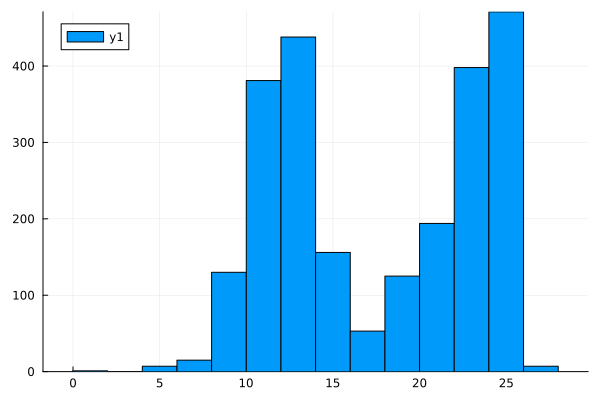

In [18]:
StatsPlots.histogram(log2.(cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"]))

In [19]:
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[cross_sample_taxon_report_summary[!, "number_of_fragments_at_or_below_taxon"] .>= 3, :]
cross_sample_taxon_report_summary[!, "sample_identifier"] = string.(first.(split.(cross_sample_taxon_report_summary[!, "sample_identifier"], '.')))

Row,number_of_fragments_at_or_below_taxon,ncbi_taxonid,scientific_name,sample_identifier,taxon
,Int64,Int64,String,String,String
1,355,10239,Viruses,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
2,6051,2157,Archaea,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
3,10606176,2759,Eukaryota,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
4,1224652,2,Bacteria,SRR6399459.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
5,1766,10239,Viruses,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses
6,4331,2157,Archaea,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2157_Archaea
7,19211279,2759,Eukaryota,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2759_Eukaryota
8,880980,2,Bacteria,SRR6399460.k2_pluspfp_20221209.kraken-report.tsv,2_Bacteria
9,1509,10239,Viruses,SRR6399461.k2_pluspfp_20221209.kraken-report.tsv,10239_Viruses


In [ ]:
# aownership
metadata_by_owner = DataFrames.groupby(joint_metadata, "aownership")

In [235]:
full_table[!, "temperature"]

852-element Vector{Union{Nothing, Float64}}:
 32.16599933
 32.16599933
 32.16599933
 32.16599933
 31.34009788
 31.34009788
 31.34009788
 31.34009788
 29.46885435
 29.46885435
 29.46885435
 29.46885435
 32.83491614
  ⋮
 26.31469624
 26.31469624
 26.31469624
 26.31469624
 28.0277775
 28.0277775
 28.0277775
 28.0277775
 30.40710621
 30.40710621
 30.40710621
 30.40710621

In [249]:
# full_table = DataFrames.innerjoin(joint_metadata, cross_sample_taxon_report_summary, on="Run" => "sample_identifier")

# # "date.start",
# # "date.end",
# # "ncbi_taxonid",
# # "scientific_name",
# full_table = full_table[!, [
#     # "aownership", # categorical
#     "season", # categorical
#     # "geo_loc_name", # categorical
#     # "weekend", # categorical
#     "temperature",
#     "humid",
#     "particle",
#     "Run",
#     "taxon", # categorical
#     "number_of_fragments_at_or_below_taxon",
#     ]]

# for col in [
#     # "aownership", # categorical
#     "season", # categorical
#     # "geo_loc_name", # categorical
#     # "weekend", # categorical
#     "taxon", # categorical
#     ]
#     full_table[!, col] = CategoricalArrays.categorical(full_table[!, col])
# end

# full_table[!, "temperature"] = something.(tryparse.(Float64, full_table[!, "temperature"]), missing)
# full_table[!, "humid"] = something.(tryparse.(Float64, full_table[!, "humid"]), missing)
# full_table[!, "particle"] = something.(tryparse.(Float64, full_table[!, "particle"]), missing)

# full_table = DataFrames.dropmissing(full_table)


# # get virus table
# # for future levels, need to do all of these
# taxon_table = first(DataFrames.groupby(full_table, "taxon"))

# # could use MLJ for this?
# # Splitting the data
# # train_indices, test_indices = split_indices(1:DataFrames.nrow(full_table), 0.8)
# # train_data = full_table[train_indices, :]
# # test_data = full_table[test_indices, :]

# # Define the model
# # geo_loc_name
# # weekend
# # aownership
# model = GLM.lm(GLM.@formula(number_of_fragments_at_or_below_taxon ~ particle + humid + temperature + season ), taxon_table)

# # Train the model
# # GLM.fit!(model)

# # Evaluate the model
# # predictions = GLM.predict(model, taxon_table)/

StatsModels.TableRegressionModel{GLM.LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

number_of_fragments_at_or_below_taxon ~ 1 + particle + humid + temperature + season

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                     Coef.     Std. Error      t  Pr(>|t|)       Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)     116694.0        2.96202e5   0.39    0.6940      -4.6735e5       7.00738e5
particle          -386.833   1052.92       -0.37    0.7137   -2462.95        1689.29
humid            -1007.78    3361.26       -0.30    0.7646   -7635.45        5619.88
temperature       -233.511   7634.08       -0.03    0.9756  -15286.2        14819.2
season: spring  -17652.0    62379.6        -0.28    0.7775      -1.40651e5      1.05347e5


In [255]:
full_table = DataFrames.innerjoin(joint_metadata, cross_sample_taxon_report_summary, on="Run" => "sample_identifier")

# "date.start",
# "date.end",
# "ncbi_taxonid",
# "scientific_name",
full_table = full_table[!, [
    # "aownership", # categorical
    "geo_loc_name", # categorical
    "weekend", # categorical
    "season", #categorical
    "taxon", # categorical
    "number_of_fragments_at_or_below_taxon",
    ]]

for col in [
    # "aownership", # categorical
    "season", # categorical
    "geo_loc_name", # categorical
    "weekend", # categorical
    "taxon", # categorical
    ]
    full_table[!, col] = CategoricalArrays.categorical(full_table[!, col])
end

# full_table[!, "temperature"] = something.(tryparse.(Float64, full_table[!, "temperature"]), missing)
# full_table[!, "humid"] = something.(tryparse.(Float64, full_table[!, "humid"]), missing)
# full_table[!, "particle"] = something.(tryparse.(Float64, full_table[!, "particle"]), missing)

full_table = DataFrames.dropmissing(full_table)


# get virus table
# for future levels, need to do all of these
taxon_table = first(DataFrames.groupby(full_table, "taxon"))

# could use MLJ for this?
# Splitting the data
# train_indices, test_indices = split_indices(1:DataFrames.nrow(full_table), 0.8)
# train_data = full_table[train_indices, :]
# test_data = full_table[test_indices, :]

# Define the model
# geo_loc_name
# weekend
# aownership
model = GLM.lm(GLM.@formula(number_of_fragments_at_or_below_taxon ~ geo_loc_name + weekend + season), taxon_table)

# Train the model
# GLM.fit!(model)

# Evaluate the model
# predictions = GLM.predict(model, taxon_table)/

StatsModels.TableRegressionModel{GLM.LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

number_of_fragments_at_or_below_taxon ~ 1 + geo_loc_name + weekend + season

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                            Coef.      Std. Error      t  Pr(>|t|)        Lower 95%       Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                                        -29576.4             2.92909e5  -0.10    0.9197       -6.08498e5       5.49345e5
geo_loc_name: Belgium:NA,Oostkamp                   -2026.0        402208.0        -0.01    0.9960       -7.96974e5       7.92922e5
geo_loc_name: Canada:NA,Banff                       

In [196]:
# only 2 samples - P7
# # i = 3

# i = 1
# i = 2
# i = 4
# i = 5
# i = 6
# i = 7
# i = 8
# i = 9
participant_table = DataFrames.innerjoin(
    metadata_by_owner[i],
    cross_sample_taxon_report_summary,
    on="Run" => "sample_identifier"
)

participant_table = participant_table[!, [
    "aownership",
    "season",
    "geo_loc_name",
    "weekend",
    "temperature",
    "humid",
    "particle",
    "Run",
    "date.start",
    "date.end",
    "ncbi_taxonid",
    "scientific_name",
    "taxon",
    "number_of_fragments_at_or_below_taxon",
    ]]

participant_table[!, "date.start"] = Dates.Date.(participant_table[!, "date.start"], "yyyy-mm-dd")
participant_table[!, "date.end"] = Dates.Date.(participant_table[!, "date.end"], "yyyy-mm-dd")

sort!(participant_table, "date.start")

participant_table[!, "date.start_relative"] = participant_table[!, "date.start"] .- first(participant_table[!, "date.start"])

participant_table[!, "date.end_relative"] = participant_table[!, "date.end"] .- first(participant_table[!, "date.start"])

participant_table[!, "duration"] = participant_table[!, "date.end"] .- participant_table[!, "date.start"]

participant = participant_table[1, "aownership"]

participant_table

Row,aownership,season,geo_loc_name,weekend,temperature,humid,particle,Run,date.start,date.end,ncbi_taxonid,scientific_name,taxon,number_of_fragments_at_or_below_taxon,date.start_relative,date.end_relative,duration
,String,String,String,String,String,String,String,String,Date,Date,Int64,String,String,Int64,Dates.Day,Dates.Day,Dates.Day
1,P2,fall,"USA:california,Menlo Park",weekday,20.44978778,51.58482196,12.1201559,SRR6399566,2014-11-24,2014-12-01,10239,Viruses,10239_Viruses,701,0 days,7 days,7 days
2,P2,fall,"USA:california,Menlo Park",weekday,20.44978778,51.58482196,12.1201559,SRR6399566,2014-11-24,2014-12-01,2157,Archaea,2157_Archaea,1660,0 days,7 days,7 days
3,P2,fall,"USA:california,Menlo Park",weekday,20.44978778,51.58482196,12.1201559,SRR6399566,2014-11-24,2014-12-01,2759,Eukaryota,2759_Eukaryota,5303669,0 days,7 days,7 days
4,P2,fall,"USA:california,Menlo Park",weekday,20.44978778,51.58482196,12.1201559,SRR6399566,2014-11-24,2014-12-01,2,Bacteria,2_Bacteria,6387496,0 days,7 days,7 days
5,P2,winter,"USA:california,Menlo Park",weekday,22.37664708,44.41871313,28.55932015,SRR6399858,2015-01-16,2015-01-26,10239,Viruses,10239_Viruses,602,53 days,63 days,10 days
6,P2,winter,"USA:california,Menlo Park",weekday,22.37664708,44.41871313,28.55932015,SRR6399858,2015-01-16,2015-01-26,2157,Archaea,2157_Archaea,41,53 days,63 days,10 days
7,P2,winter,"USA:california,Menlo Park",weekday,22.37664708,44.41871313,28.55932015,SRR6399858,2015-01-16,2015-01-26,2759,Eukaryota,2759_Eukaryota,57946720,53 days,63 days,10 days
8,P2,winter,"USA:california,Menlo Park",weekday,22.37664708,44.41871313,28.55932015,SRR6399858,2015-01-16,2015-01-26,2,Bacteria,2_Bacteria,375608,53 days,63 days,10 days
9,P2,winter,"USA:california,Menlo Park",weekday,23.87863395,47.8912114,16.71219046,SRR6399667,2015-02-06,2015-02-12,10239,Viruses,10239_Viruses,2692,74 days,80 days,6 days


In [197]:
samples = sort(unique(participant_table[!, "Run"]))
taxon = sort(unique(participant_table[!, "taxon"]))
samples_map = Dict(sample => i for (i, sample) in enumerate(samples))
counts = zeros(length(samples), length(taxon))
for (column_index, taxon_table) in enumerate(DataFrames.groupby(sort(participant_table, "taxon"), "taxon"))
    for sample_table in DataFrames.groupby(taxon_table, "Run")
        sample = sample_table[1, "Run"]
        row_index = samples_map[sample]
        @assert DataFrames.nrow(sample_table) == 1
        counts[row_index, column_index] = sum(sample_table[!, "number_of_fragments_at_or_below_taxon"])
    end
end
counts

# sort group so largest single sample group is first
frequency_ordering = sortperm(maximum.(eachcol(counts)))
counts = counts[:, frequency_ordering]
# find taxa that have no representation, and filter them out
is_detected = [sum(col) >= 3 for col in eachcol(counts)]
counts = counts[:, is_detected]

sample_has_classifications = [sum(row) > 0 for row in eachrow(counts)]
counts = counts[sample_has_classifications, :]
samples = samples[sample_has_classifications]

counts

18×4 Matrix{Float64}:
   8509.0    1698.0  377116.0        1.4999e7
  15011.0    3360.0  533280.0        2.70027e7
   5929.0    4412.0  909547.0        3.48486e7
   5523.0  551535.0       2.13296e6  1.22177e7
   3525.0   55472.0       2.38797e6  2.12655e7
   4268.0   89658.0       3.74443e6  2.25051e7
   1660.0     701.0       6.3875e6   5.30367e6
  18293.0    1745.0       9.4018e6   6.54632e6
   9621.0    9358.0       1.40767e6  3.6934e7
  11013.0    2692.0       1.7631e6   1.46049e7
   9742.0   10120.0       1.33565e6  1.5075e7
    648.0    1156.0       1.02667e6  3.81337e7
 119689.0    2904.0       2.83236e6  9.21607e6
     41.0     602.0  375608.0        5.79467e7
  14209.0    3492.0       2.28936e6  2.31309e7
   3988.0   18063.0       4.67842e6  7.36417e7
  13155.0    3631.0       1.60721e6  6.40606e6
   1942.0    4595.0  554484.0        2.46065e7

In [198]:
unique_taxa = sort(unique(participant_table[!, "ncbi_taxonid"]))

4-element Vector{Int64}:
     2
  2157
  2759
 10239

In [199]:
colorscheme = Colors.distinguishable_colors(length(unique_taxa), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)

In [200]:
normalized_counts = counts ./ sum(counts, dims=2)

18×4 Matrix{Float64}:
 0.000553022  0.000110357  0.0245098   0.974827
 0.000544778  0.000121941  0.0193537   0.97998
 0.00016576   0.000123349  0.0254287   0.974282
 0.000370479  0.0369965    0.143077    0.819556
 0.000148656  0.00233936   0.100705    0.896807
 0.000162013  0.00340342   0.142139    0.854296
 0.000141959  5.99477e-5   0.546242    0.453556
 0.00114559   0.00010928   0.588784    0.409961
 0.000250804  0.000243948  0.0366957   0.96281
 0.000672275  0.00016433   0.107626    0.891537
 0.000592919  0.000615925  0.0812907   0.9175
 1.65466e-5   2.95183e-5   0.0262158   0.973738
 0.00983393   0.0002386    0.232713    0.757214
 7.02982e-7   1.03218e-5   0.00644014  0.993549
 0.000558575  0.000137275  0.0899976   0.909307
 5.09049e-5   0.000230565  0.0597178   0.940001
 0.00163822   0.000452176  0.200149    0.797761
 7.71629e-5   0.000182576  0.0220317   0.977709

In [201]:
distance_matrix = Distances.pairwise(Distances.Euclidean(), normalized_counts, dims=1)
clustering = Clustering.hclust(distance_matrix, branchorder=:optimal)

Clustering.Hclust{Float64}([-3 -12; -1 1; … ; 13 14; 16 15], [0.000973000438997735, 0.0011363232129744814, 0.0035427708432513912, 0.0038309937140436363, 0.008981481020771195, 0.011965874836037943, 0.015144735337726404, 0.016610581370154098, 0.01874021320180976, 0.031178415395199114, 0.032408282190699925, 0.04833523162817212, 0.05088037408585682, 0.05264631671302675, 0.06092083161043588, 0.07119933644365366, 0.43658065092996107], [14, 2, 18, 1, 3, 12, 9, 16, 11, 15, 5, 10, 6, 4, 17, 13, 7, 8], :single)

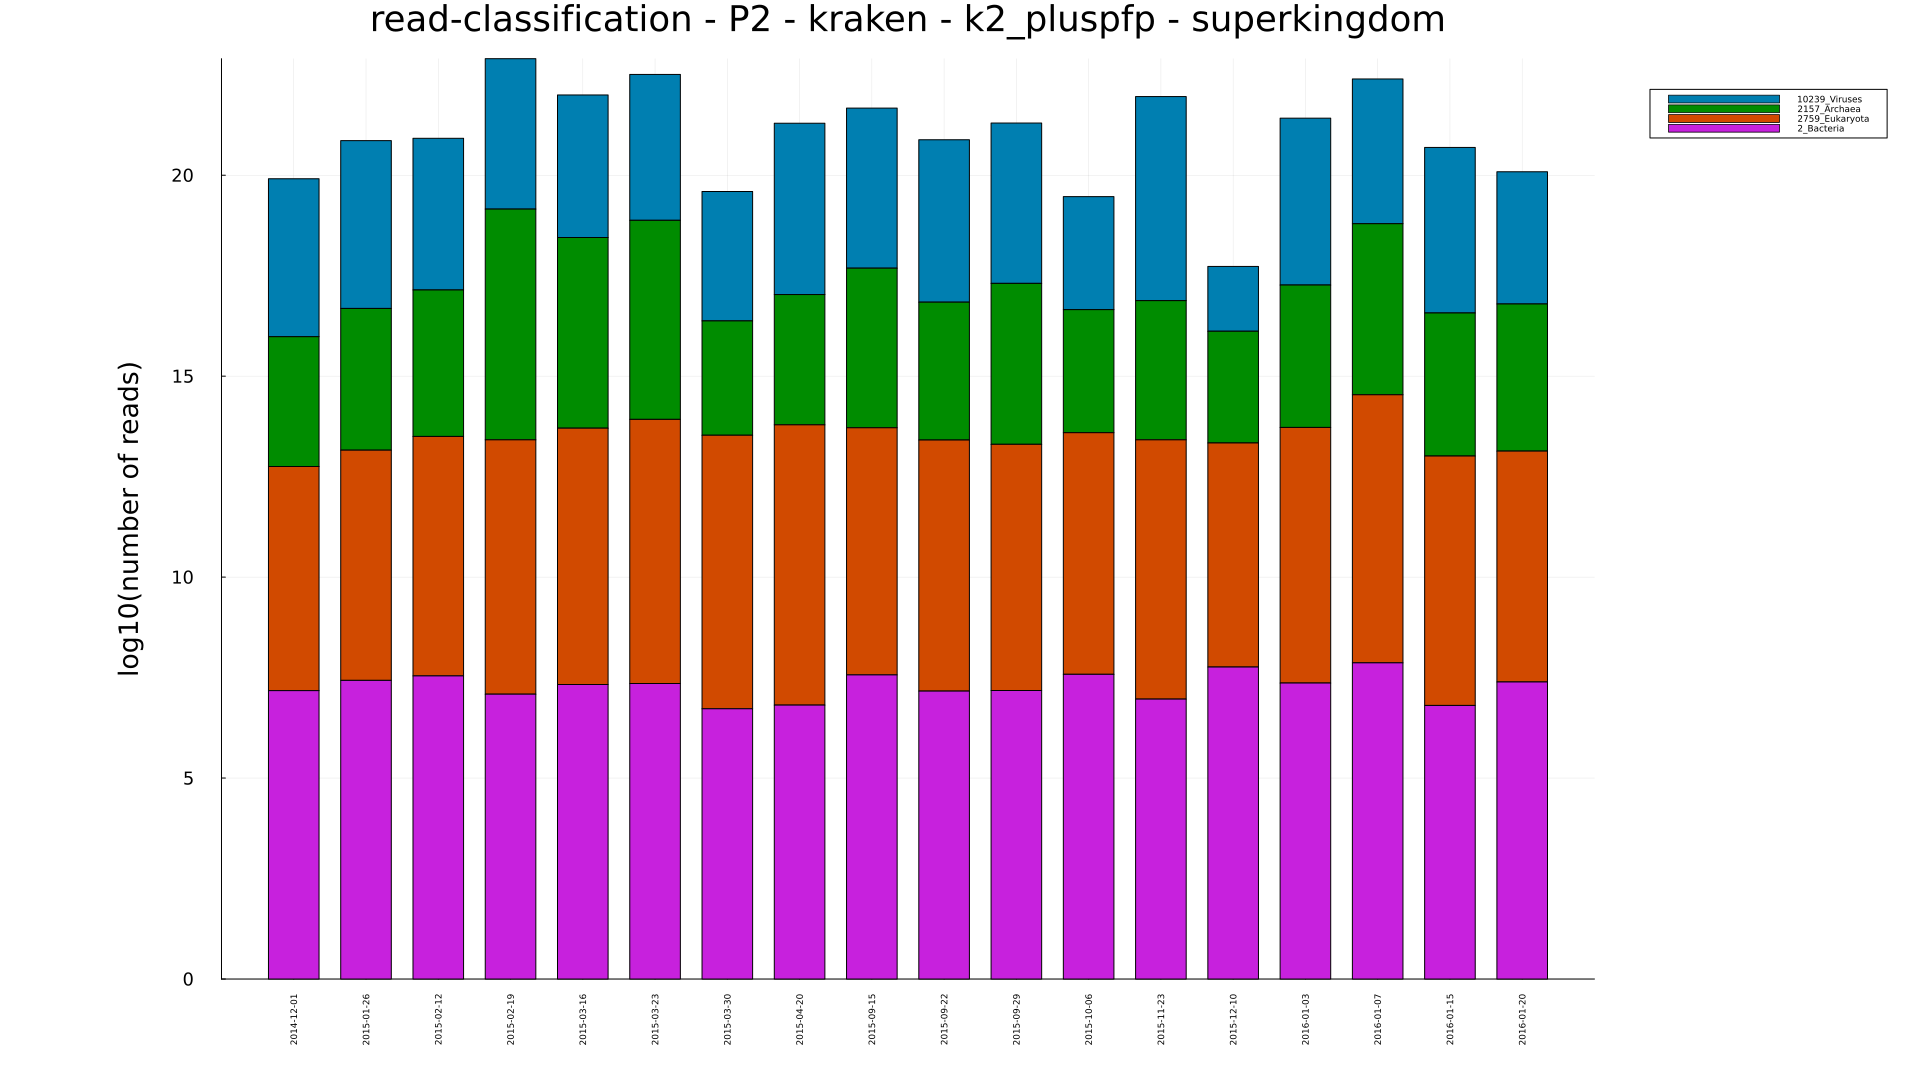

In [202]:
bottommargin = (maximum(length.(samples)) * 5)
leftmargin = 150
rightmargin = 25
topmargin = 25

width = max(1920, (length(samples) * 10) + 300)
height = max(1080, bottommargin + 600)
height = max(height, length(taxon)*11)

xtickdates = sort(unique(participant_table[!, ["date.end", "Run"]]))[!, "date.end"]

plot = StatsPlots.groupedbar(
    log10.(counts),
    title = "read-classification - $(participant) - kraken - $(kraken_db) - $(taxon_level)",
    titlefontsize = 24,
    xticks = (1:length(samples), xtickdates),
    xlims = (0, length(samples)+1),
    xtickfontsize = 6,
    ytickfontsize = 12,
    size= (width, height),
    xrotation=90,
    ylabel = "log10(number of reads)",
    ylabelfontsize = 18,
    labels = hcat(taxon...),
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
    legendmargins = 0,
    legend = :outertopright,
    legendfontsize = 6,
    bar_position = :stack,
    bar_width=0.7,
    seriescolor = hcat(reverse(colorscheme)...),
)
display(plot)
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).by-participant.$(participant).total-reads") * extension
    StatsPlots.savefig(plot, file)
end

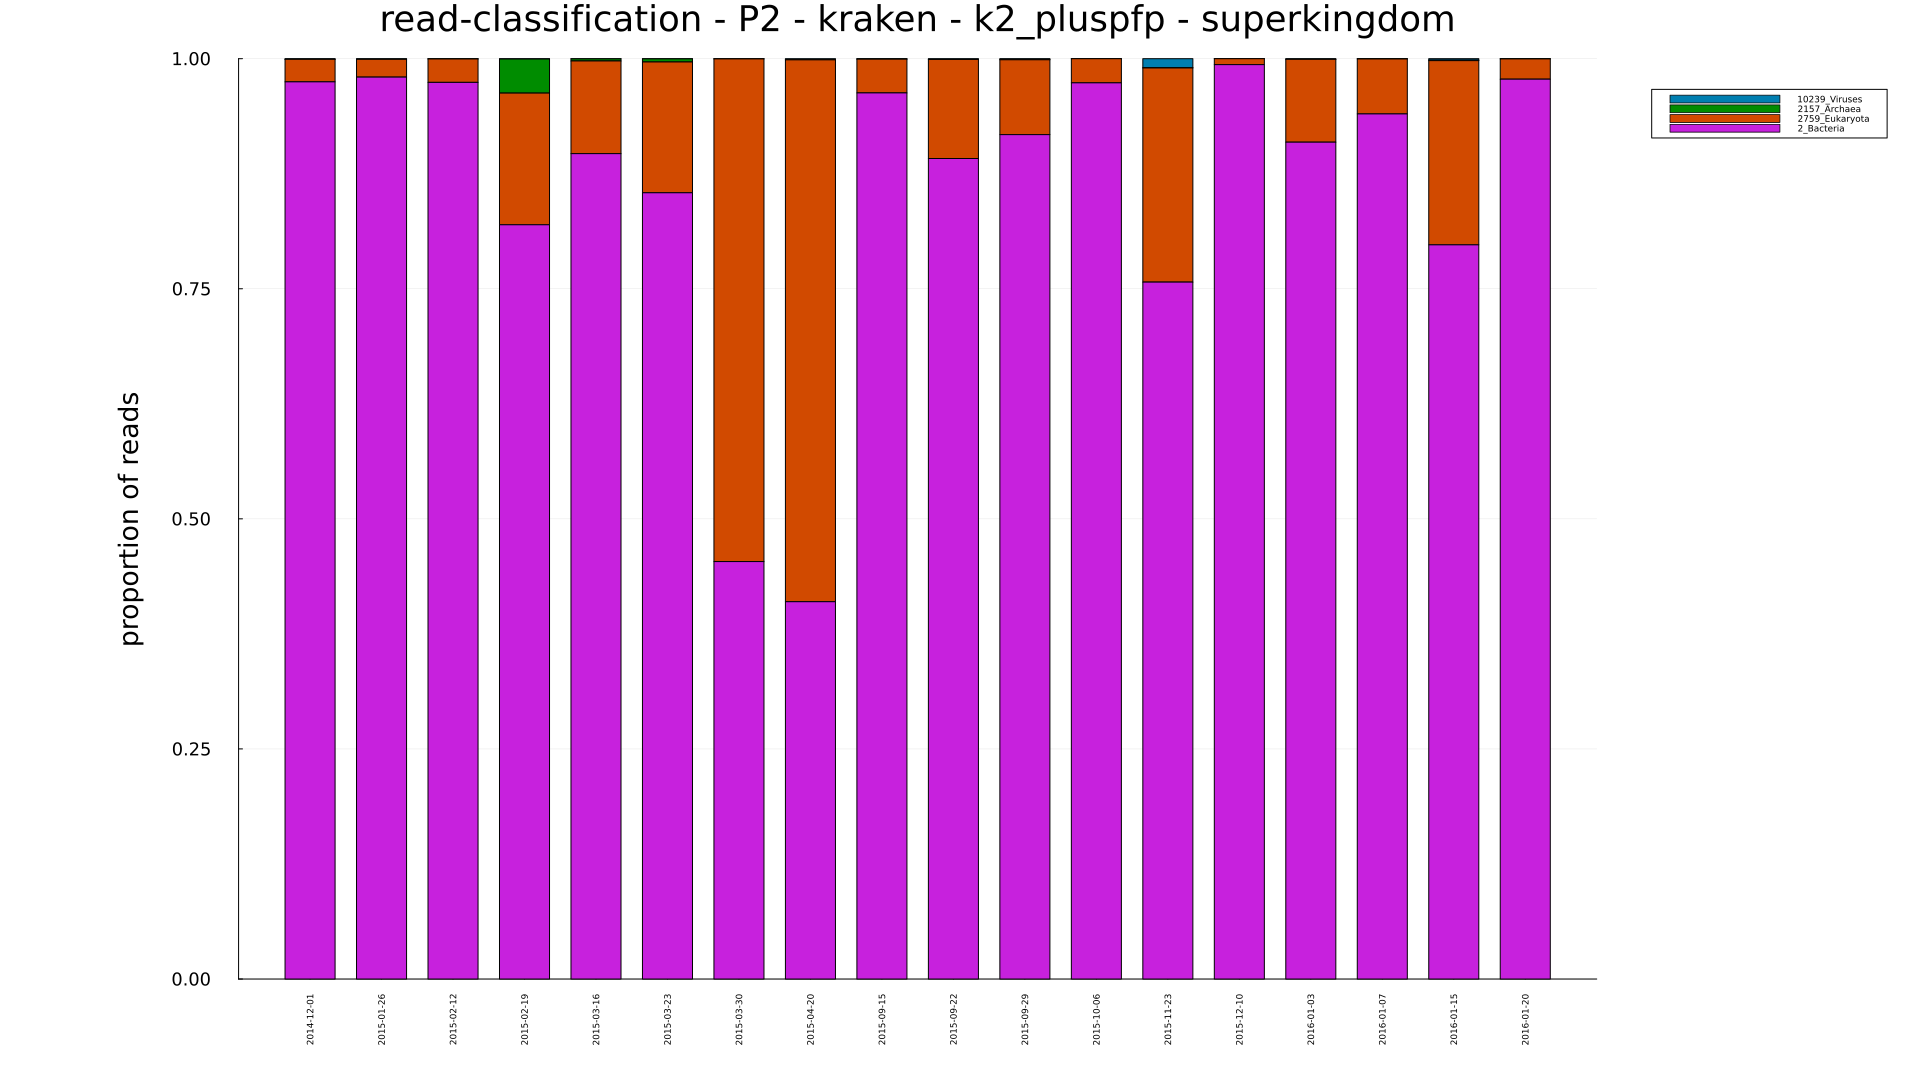

In [203]:
plot = StatsPlots.groupedbar(
    normalized_counts,
    title = "read-classification - $(participant) - kraken - $(kraken_db) - $(taxon_level)",
    titlefontsize = 24,
    xticks = (1:length(samples), xtickdates),
    xlims = (0, length(samples)+1),
    xtickfontsize = 6,
    ytickfontsize = 12,
    size= (width, height),
    xrotation=90,
    ylabel = "proportion of reads",
    ylabelfontsize = 18,
    labels = hcat(taxon...),
    leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
    topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
    rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
    bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
    legendmargins = 0,
    legend = :outertopright,
    bar_position = :stack,
    bar_width=0.7,
    seriescolor = hcat(reverse(colorscheme)...),
    legendfontsize = 6,
)
display(plot)
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).by-participant.$(participant).normalized-reads") * extension
    StatsPlots.savefig(plot, file)
end